In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
N = 10000

In [2]:
#Распределение.
alpha = 0;
sigma = 1

ourDistribution = sps.cauchy(loc = alpha, scale = sigma);

In [3]:
def calculateEmpiric(n, grid, nSortedSelection):
    F_star = np.zeros(N);
    counter = 0;
    for i in range(0, N) :
        x = grid[i];
        if (counter < n and x > nSortedSelection[counter]) :
            counter += 1
        F_star[i] = counter/n;
    return (grid, F_star);

def printGraph(n, ourSelection, ourDistribution) :
    # Сетка для построения графика функции распределения.
    grid = np.linspace(-10, 10, N);
    
    # Графичек.
    plt.figure(figsize=(20,10))
    plt.title('n = ' + str(n), fontsize = 30);
    
    #Нанесём график функции распределения.
    plt.plot(grid, ourDistribution.cdf(grid), color = 'red', label = '$F(x)$');
    
    # Посчитаем эмпирическую функцию распределения.
    ourSorted = sorted(ourSelection[:n]);
    res = calculateEmpiric(n, grid, ourSorted);
    grid = res[0];
    F_star = res[1];
    # Нанесём график эмпирической функции распределения.
    plt.plot(grid, F_star, color = 'green', label = '$F_{n}(x)$');
    
    # Точечки распределения
    plt.scatter(ourSorted, np.zeros(len(ourSorted)), alpha = 0.2, color = 'blue', label = '$our selection[:$' + str(n) + '$]$');
    
    plt.xlim(-10, 10);
    plt.ylim(-0.1, 1.1);
    plt.legend(fontsize = 25, bbox_to_anchor=(1, 0.7))
    plt.show()

In [4]:
# Генерим выборку.
ourSelection = ourDistribution.rvs(size = N);

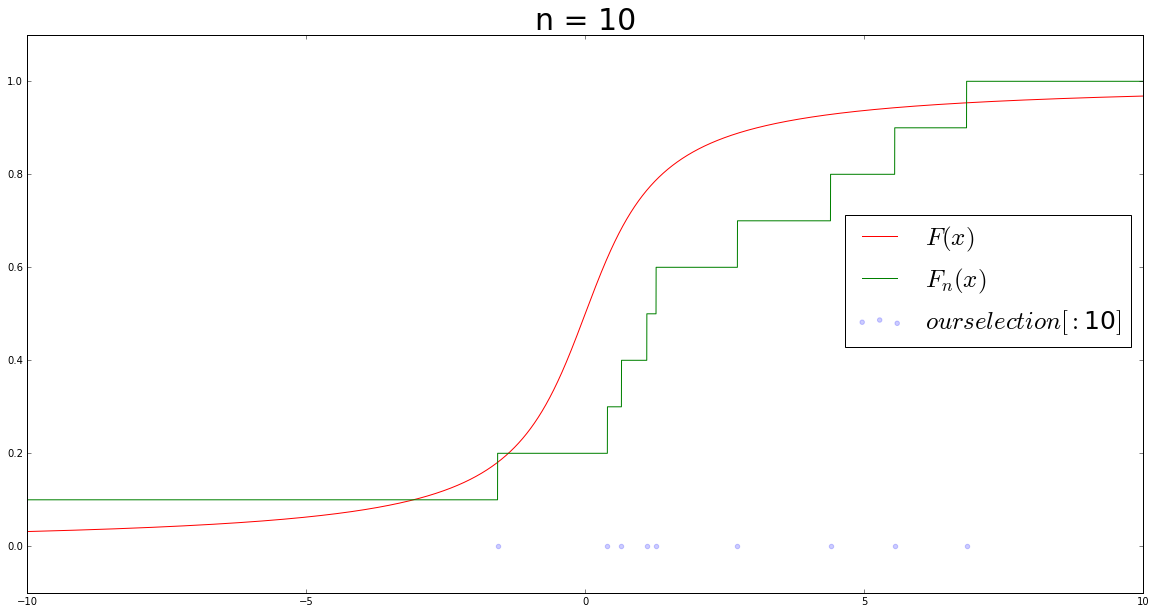

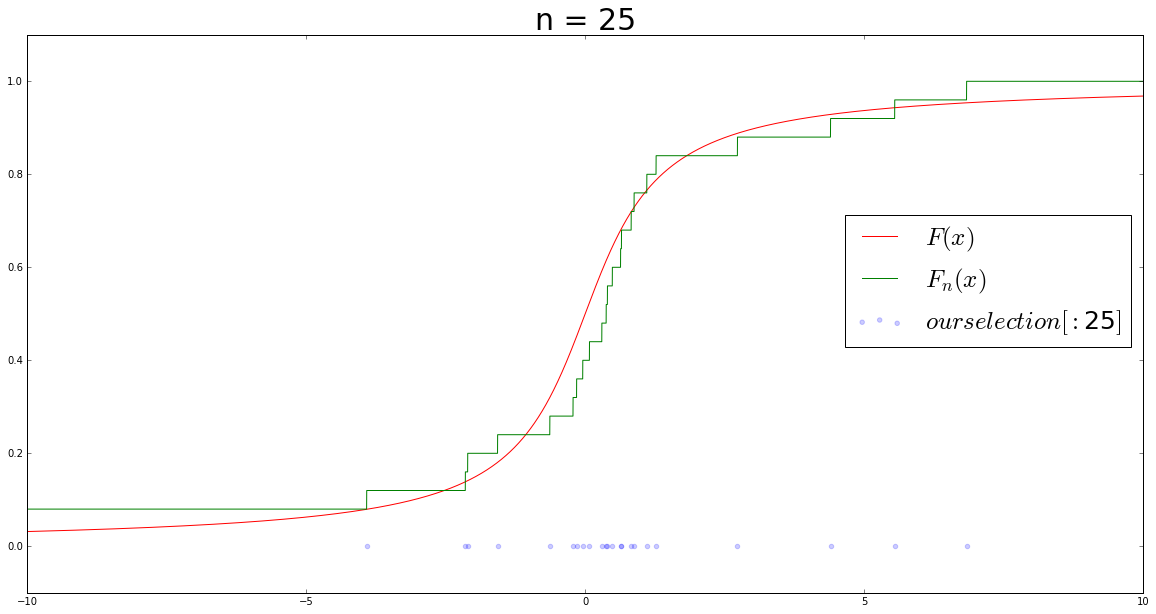

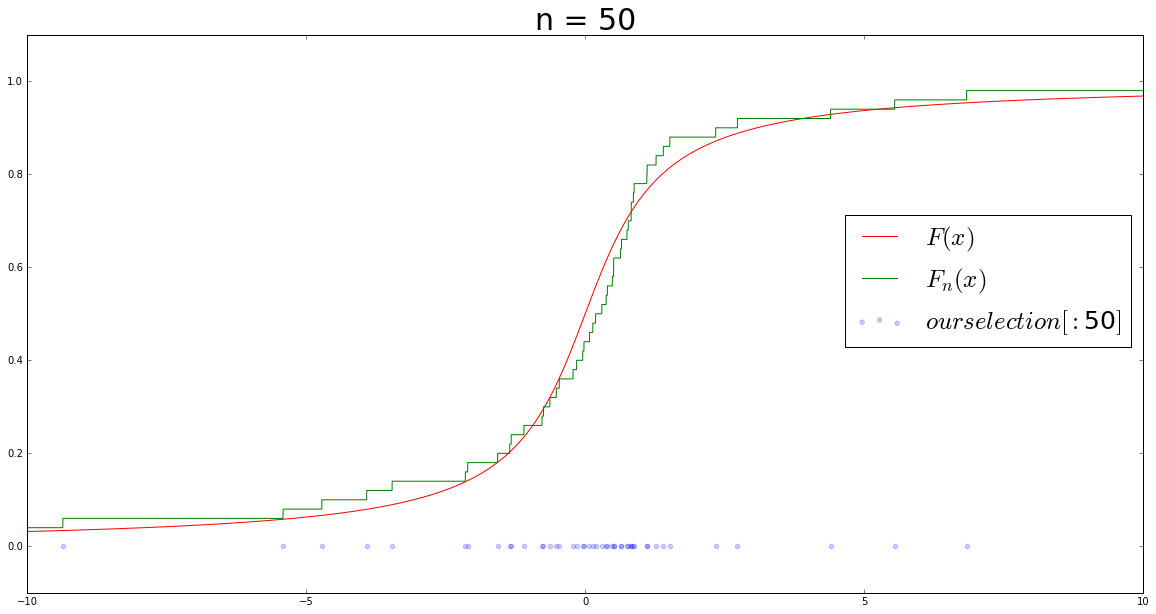

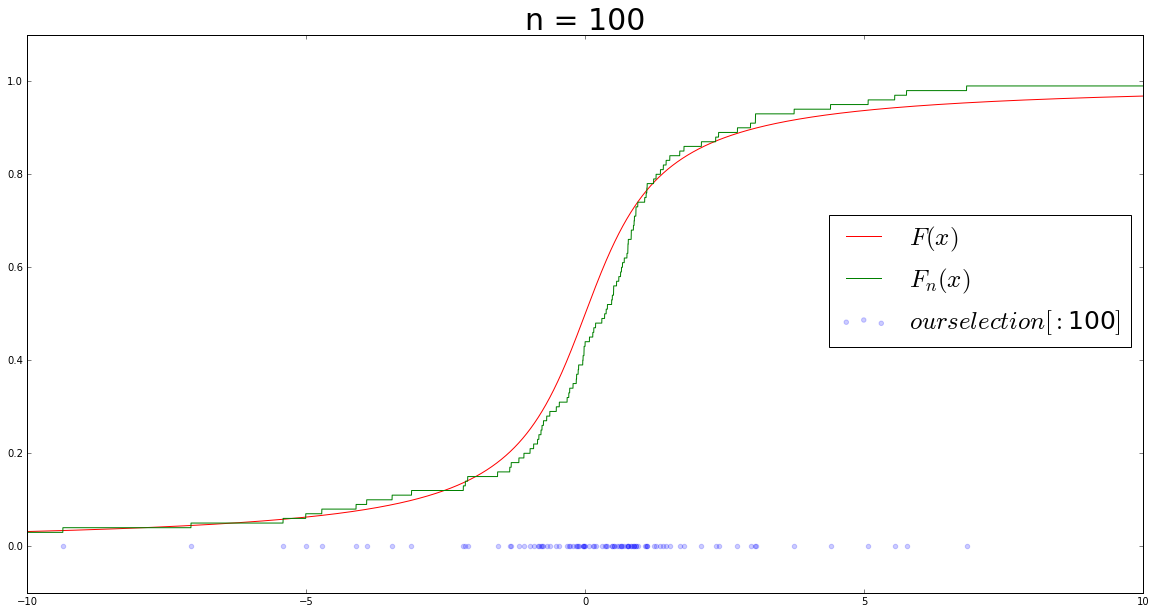

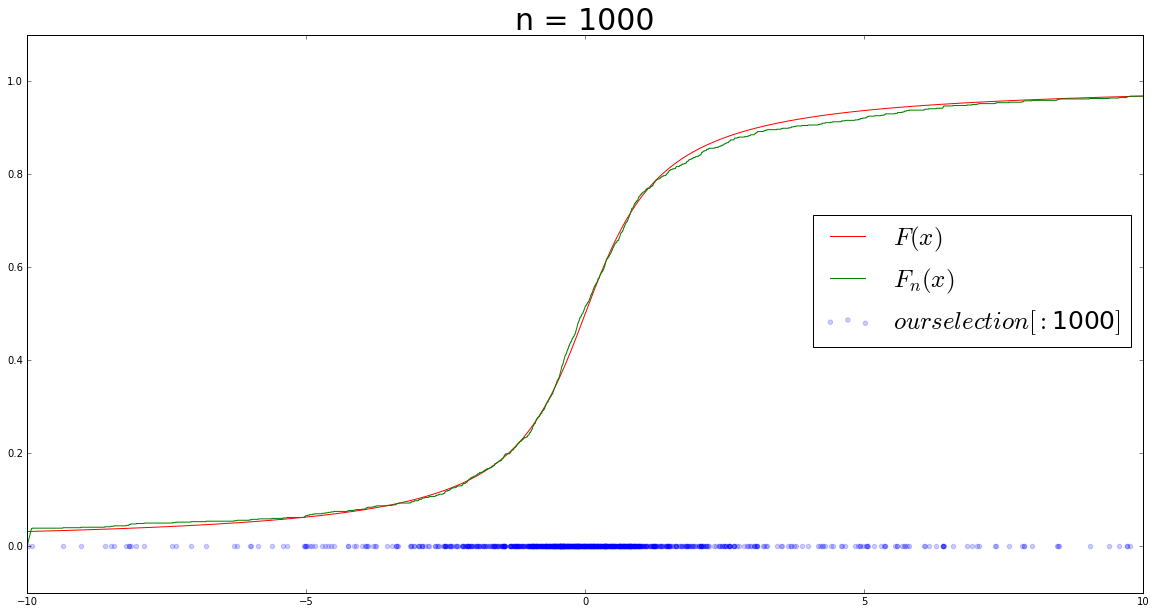

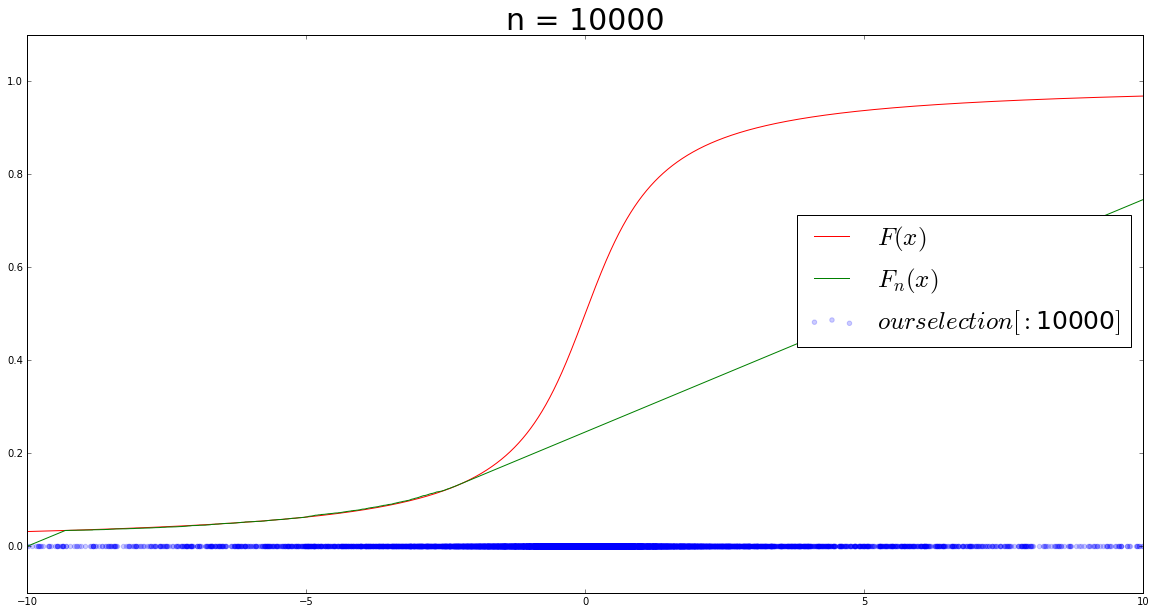

In [5]:
# Выводим графики...
def showGraphs(numbers) :
    for n in numbers :
        printGraph(n, ourSelection, ourDistribution);

numbers = [10, 25, 50, 100, 1000, 10000]
showGraphs(numbers);


## Для всех $n\leq N$ посчитаем  точное значение $D_n=\sup_{x\in \\R} |F(x) - F_n(x)|$

In [9]:
D = np.zeros(N + 1);
for n in range (1, N + 1) :
    res = calculateEmpiric(n, sorted(ourSelection[:n]));
    grid = res[0]
    F_n = res[1]
    F = ourDistribution.cdf(grid);
    delta = abs(F - F_n);
    D[n] = max(delta);
#    print('D(' + str(n) + ') = ', D[n])v

## Построим график зависимости $D_n(n)$

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, N + 2), D, color = 'red', label = '$D_n(n)$');
plt.legend(fontsize = 50);
plt.xlabel('n', fontsize = 20);
plt.ylabel('$F_n(x) - F(x)$', fontsize = 30);
plt.xlim(0, N);
plt.show()

## Как можно понять из графика, с ростом n -  количества элементов в выборке, как и ожидалось, максимальное отклонение $F_n(x)$ от $F(x)$ уменьшается.